In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Parsed with column specification:
cols(
  ID = col_integer(),
  Condition = col_integer(),
  Trial = col_integer(),
  justice = col_integer(),
  age = col_integer(),
  participantgender = col_integer(),
  gender = col_integer(),
  race = col_integer(),
  year = col_integer()
)


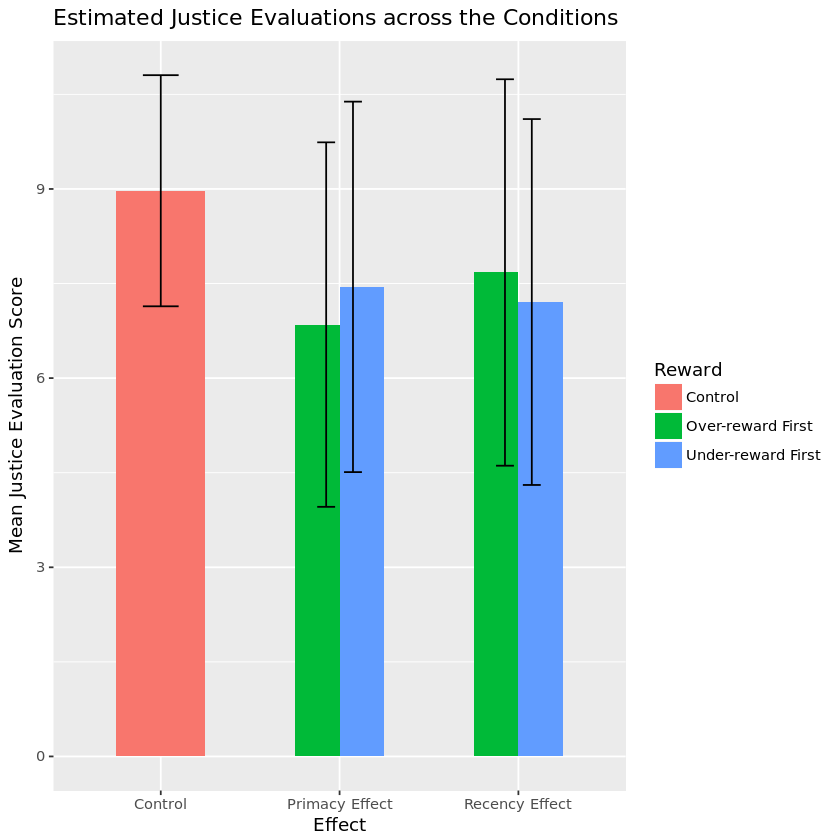

In [3]:
data <- read_csv("https://raw.githubusercontent.com/lizvance/Reproducibility_Project/master/RS_Anchor_Park-and-Melamed.csv")
sdJustice <- data %>%
  group_by(Condition)%>%
  summarise(sdJust <- sd(justice))
avgJustice <- data %>%
  group_by(Condition) %>%
  summarise(avgJust <- mean(justice))
combined <- cbind(avgJustice, sdJustice$`sdJust <- sd(justice)`)
combined <- as.data.frame(combined)
colnames(combined) <- c("Condition", "AverageJustice", "sdJustice")
combined$Reward<- c("Under-reward First", "Over-reward First", "Under-reward First","Over-reward First", "Control")
combined$Effect <- c("Primacy Effect", "Primacy Effect", "Recency Effect", "Recency Effect", "Control")

print(ggplot(combined, aes(x=Effect,y=AverageJustice, fill=Reward))+
  geom_bar(stat="identity", position="dodge", width=.5)+
  geom_errorbar(aes(ymin=AverageJustice-sdJustice, ymax=AverageJustice+sdJustice), position = position_dodge(.3), width=.2)+
  ylab("Mean Justice Evaluation Score")+
  ggtitle("Estimated Justice Evaluations across the Conditions"))
